In [1]:
# import libraries
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

## Load all the datasets

In [3]:
features = pd.read_csv('../data/features.csv')
stores = pd.read_csv('../data/stores.csv')
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
features['Date'] = pd.to_datetime(features['Date'])
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [6]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   IsHoliday  115064 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


In [9]:
# bool to int
features['IsHoliday'] = features['IsHoliday'].astype('int')
train['IsHoliday'] = train['IsHoliday'].astype('int')
test['IsHoliday'] = test['IsHoliday'].astype('int')

## Store 10

In [10]:
def get_data_for_store(storeNum):
    
    return features[features['Store']==storeNum], train[train['Store']==storeNum], test[test['Store']==storeNum]

In [11]:
feature_i, train_i, test_i = get_data_for_store(10)

### Department: 10, 20, 30, 40, 50

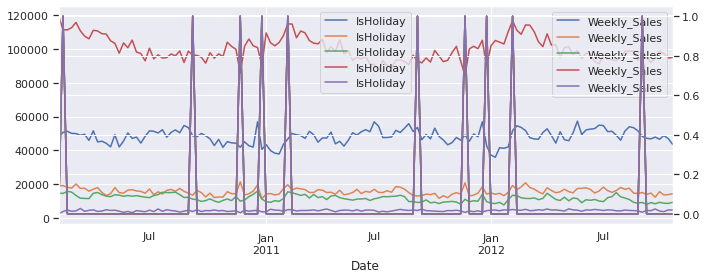

In [12]:
depts = [10, 20, 30, 40, 50]
fig,ax = plt.subplots()
twinx = ax.twinx()
for name,grp in train_i.groupby('Dept'):
    if name in depts:
        grp.plot(x='Date',y='Weekly_Sales',ax=ax)
        grp.plot(x='Date',y='IsHoliday',ax=twinx)

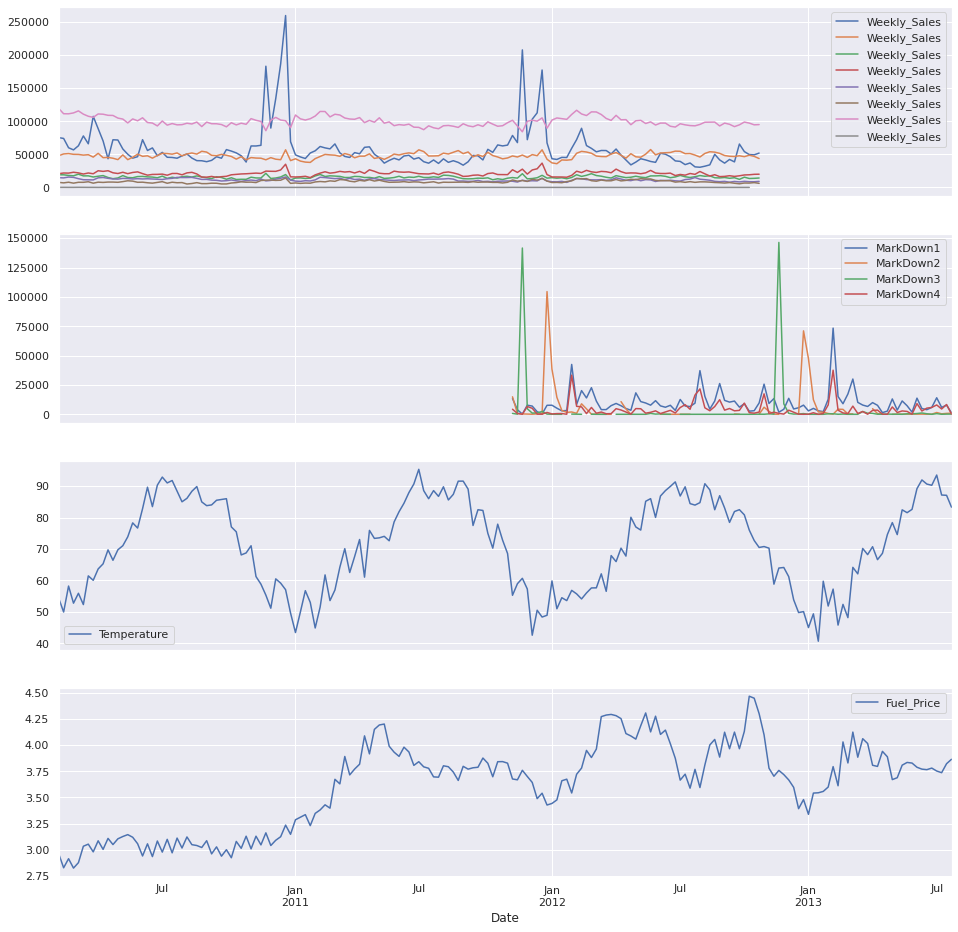

In [13]:
depts = np.arange(0,50,5)
fig,ax = plt.subplots(nrows=4,sharex=True,figsize=(16,16))

for name,grp in train_i.groupby('Dept'):
    if name in depts:
        grp.plot(x='Date',y='Weekly_Sales',ax=ax[0])

## Markdowns
feature_i.plot(x='Date',y='MarkDown1',ax=ax[1])
feature_i.plot(x='Date',y='MarkDown2',ax=ax[1])
feature_i.plot(x='Date',y='MarkDown3',ax=ax[1])
feature_i.plot(x='Date',y='MarkDown4',ax=ax[1])

## Temperature
feature_i.plot(x='Date',y='Temperature',ax=ax[2])

## Fule price
feature_i.plot(x='Date',y='Fuel_Price',ax=ax[3])


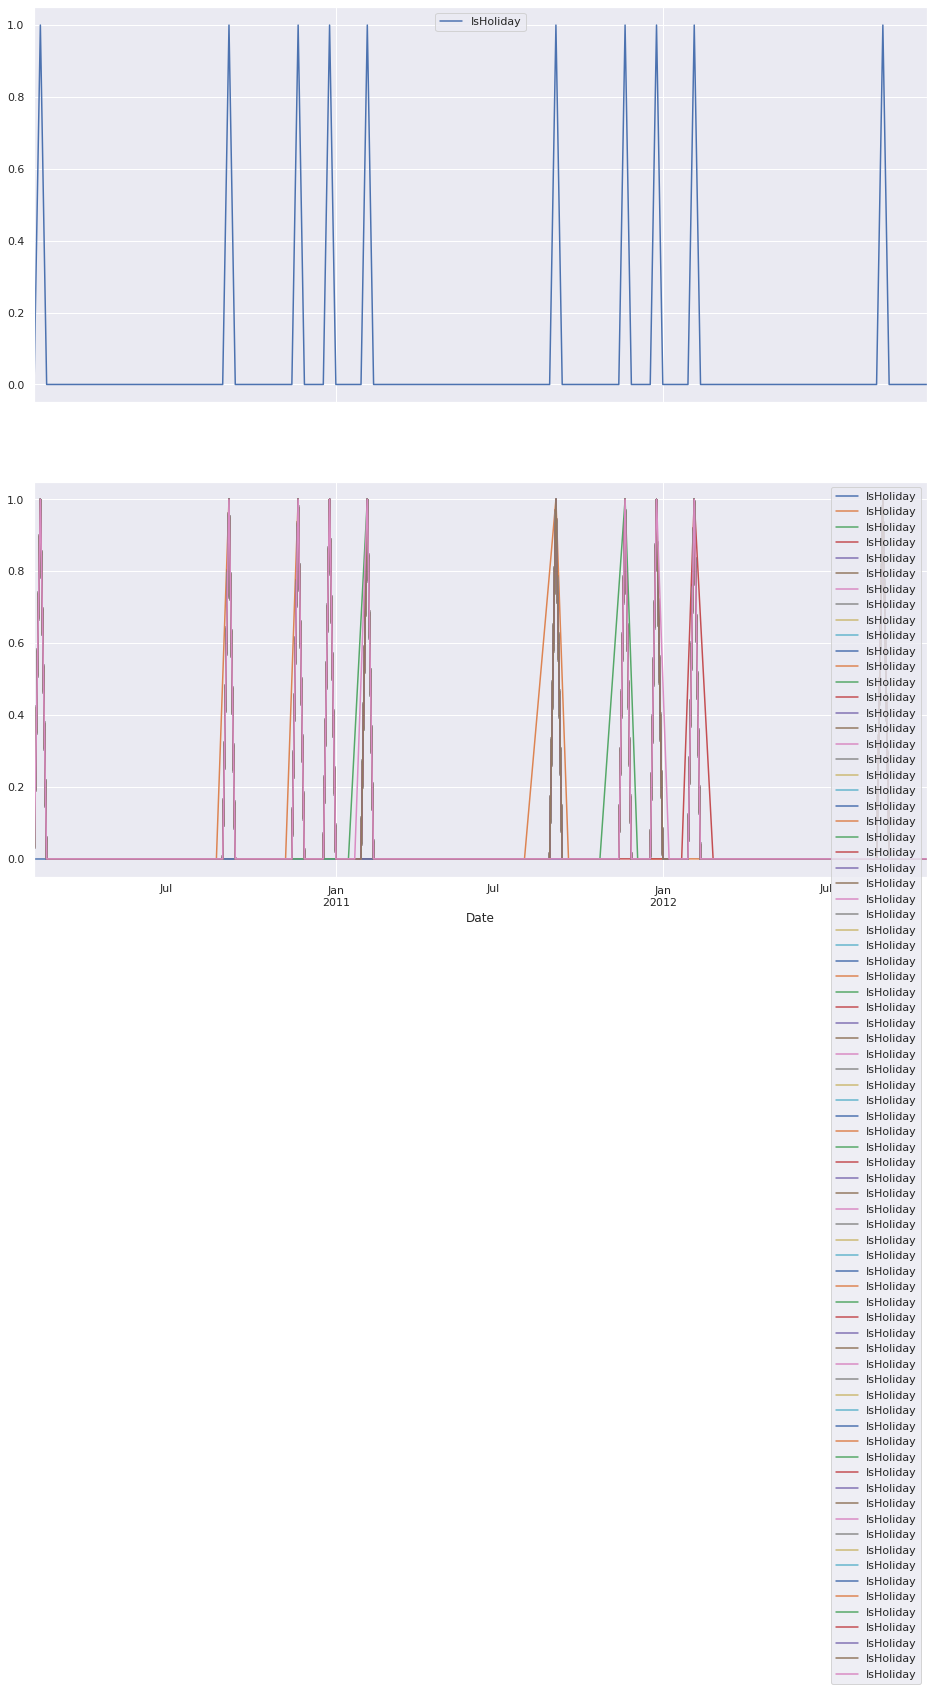

In [14]:
fig,ax = plt.subplots(nrows=2,sharex=True,figsize=(16,16))

feature_i.plot(x='Date',y='IsHoliday',ax=ax[0])
f=train_i.groupby('Dept').plot(x='Date',y='IsHoliday',ax=ax[1])

## Correlation of sales with Markdowns

In [20]:
# df_merged = pd.merge_asof(train_i[train_i['Dept']==10], feature_i, on='Date')
feature_cols = ['Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']
train_cols = ['Date','Weekly_Sales']

for name,grp in train_i.groupby('Dept'):
    merged_df = pd.merge_asof(grp[train_cols],feature_i[feature_cols],on='Date')
    break

In [25]:
merged_df.corr()['Weekly_Sales']

Weekly_Sales    1.000000
Temperature    -0.406673
Fuel_Price     -0.060884
MarkDown1      -0.174004
MarkDown2       0.059071
MarkDown3      -0.004853
MarkDown4      -0.103925
MarkDown5       0.094728
CPI            -0.042890
Unemployment    0.062843
Name: Weekly_Sales, dtype: float64

In [26]:
feature_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1638 to 1819
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         182 non-null    int64         
 1   Date          182 non-null    datetime64[ns]
 2   Temperature   182 non-null    float64       
 3   Fuel_Price    182 non-null    float64       
 4   MarkDown1     90 non-null     float64       
 5   MarkDown2     68 non-null     float64       
 6   MarkDown3     86 non-null     float64       
 7   MarkDown4     90 non-null     float64       
 8   MarkDown5     90 non-null     float64       
 9   CPI           169 non-null    float64       
 10  Unemployment  169 non-null    float64       
 11  IsHoliday     182 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 18.5 KB
